In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import Eval_model
import pickle

In [15]:
def cnn_model_2d(x_train, y_train, x_test, y_test, epochs =50):
    nClass = 4
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = x_train.shape[1:]))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(nClass, activation = 'softmax' ))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience = 20), 
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
                 ]
    history = model.fit(x_train, y_train, batch_size = 32, epochs = epochs,
                        callbacks = callbacks, validation_data = (x_test, y_test) )
    
    #model.load_weights('best_model.h5')
    model.summary()
    return model, history

In [16]:
def InputPreprocess(x_train, y_train, x_test, y_test, IMG_SIZE = 64):
    
    #reshape
    x_train /= 255
    x_test  /= 255
    
    x_train = np.reshape(x_train, (-1, IMG_SIZE, IMG_SIZE, 1))
    x_test = np.reshape(x_test, (-1, IMG_SIZE, IMG_SIZE, 1))

    
    y_true = y_test
    #to categorical label

    y_train = to_categorical(y_train, num_classes = 4, dtype = 'int8')
    y_test = to_categorical(y_test, num_classes = 4, dtype = 'int8' )
    
    return x_train, y_train, x_test, y_test, y_true

In [17]:
train = pickle.load(open('train_specg_input.pk1', 'rb'))
test = pickle.load(open('test_specg_input.pk1', 'rb'))
x_train = []
y_train = []

for lb, sg in train:
    x_train.append(sg)
    y_train.append(lb)

x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('int8')

x_test = []
y_test = []
for lb, sg in test:
    x_test.append(sg)
    y_test.append(lb)

x_test = np.array(x_test).astype('float32')
y_test = np.array(y_test).astype('int8')

In [18]:
x_train, y_train, x_test, y_test, y_true = InputPreprocess(x_train, y_train, x_test, y_test, 100)

In [19]:
model, history = cnn_model_2d(x_train, y_train, x_test, y_test, 50)

Train on 8528 samples, validate on 300 samples
Epoch 1/50
8528/8528 [==============================] - 23s 3ms/sample - loss: 0.9811 - accuracy: 0.5876 - val_loss: 1.2760 - val_accuracy: 0.5000
Epoch 2/50
8528/8528 [==============================] - 21s 2ms/sample - loss: 0.9107 - accuracy: 0.6060 - val_loss: 1.1630 - val_accuracy: 0.5467
Epoch 3/50
8528/8528 [==============================] - 21s 3ms/sample - loss: 0.8883 - accuracy: 0.6194 - val_loss: 1.1617 - val_accuracy: 0.5233
Epoch 4/50
8528/8528 [==============================] - 21s 3ms/sample - loss: 0.8754 - accuracy: 0.6290 - val_loss: 1.0125 - val_accuracy: 0.5533
Epoch 5/50
8528/8528 [==============================] - 22s 3ms/sample - loss: 0.8370 - accuracy: 0.6508 - val_loss: 0.9578 - val_accuracy: 0.5633
Epoch 6/50
8528/8528 [==============================] - 22s 3ms/sample - loss: 0.7895 - accuracy: 0.6664 - val_loss: 0.9226 - val_accuracy: 0.5767
Epoch 7/50
8528/8528 [==============================] - 20s 2ms/sample 

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)       

Accuracy = 95.33%
F1 score = 93.52
Sensitivity: Normal = 0.967, AFib = 0.940, Others = 0.914, Noise = 1.000
Specificity: Normal = 0.987, AFib = 0.996, Others = 0.996, Noise = 0.963
Positive predictive value: Normal = 0.986, AFib = 0.979, Others = 0.985, Noise = 0.750
Negative predictive value: Normal = 0.967, AFib = 0.988, Others = 0.974, Noise = 1.000
Confusion matrix, without normalization


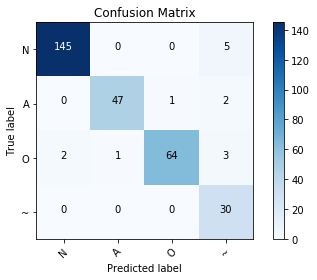

Normalized confusion matrix


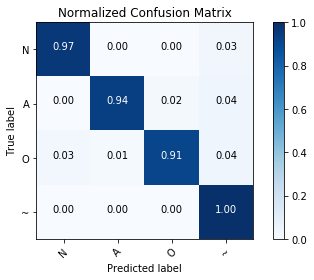

In [21]:
Eval_model.get_summary(x_test, y_true, model)

Accuracy: 95.33%


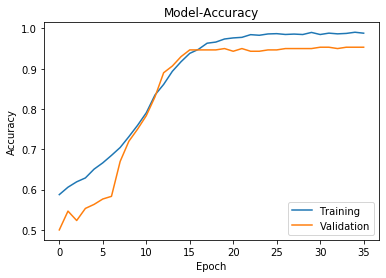

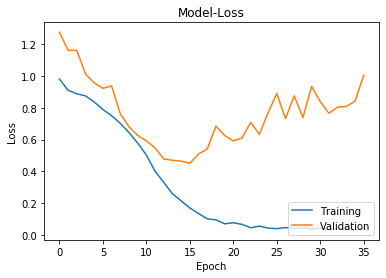

In [22]:
Eval_model.Plot_Acc_and_Loss(history, x_test, y_test, model)